In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from opqua.model import Model

Vector-borne model with susceptible and infected hosts and vectors, showing a metapopulation model setup with multiple populations connected to each other by "population contact" events between vectors and hosts, in which a vector and a
host from different populations contact each other without migrating from one population to another.

Population **A** is connected to Population **B** and to Clustered Population 4 (both are one-way connections).

Clustered Populations 0-4 are all connected to each other in two-way connections.

Isolated population is not connected to any others.

Two different pathogen genotypes are initially seeded into Populations **A** and **B**.

Simulating time: 72.34562476141473, event: RECOVER_VECTOR
Simulating time: 91.58594561605138, event: POPULATION_CONTACT_VECTOR_HOST
Simulating time: 100.00875171346124 END
Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.1937529521942139s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.019977569580078125s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.023895263671875s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  76 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0421290397644043s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 224 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0998535

...file saved.


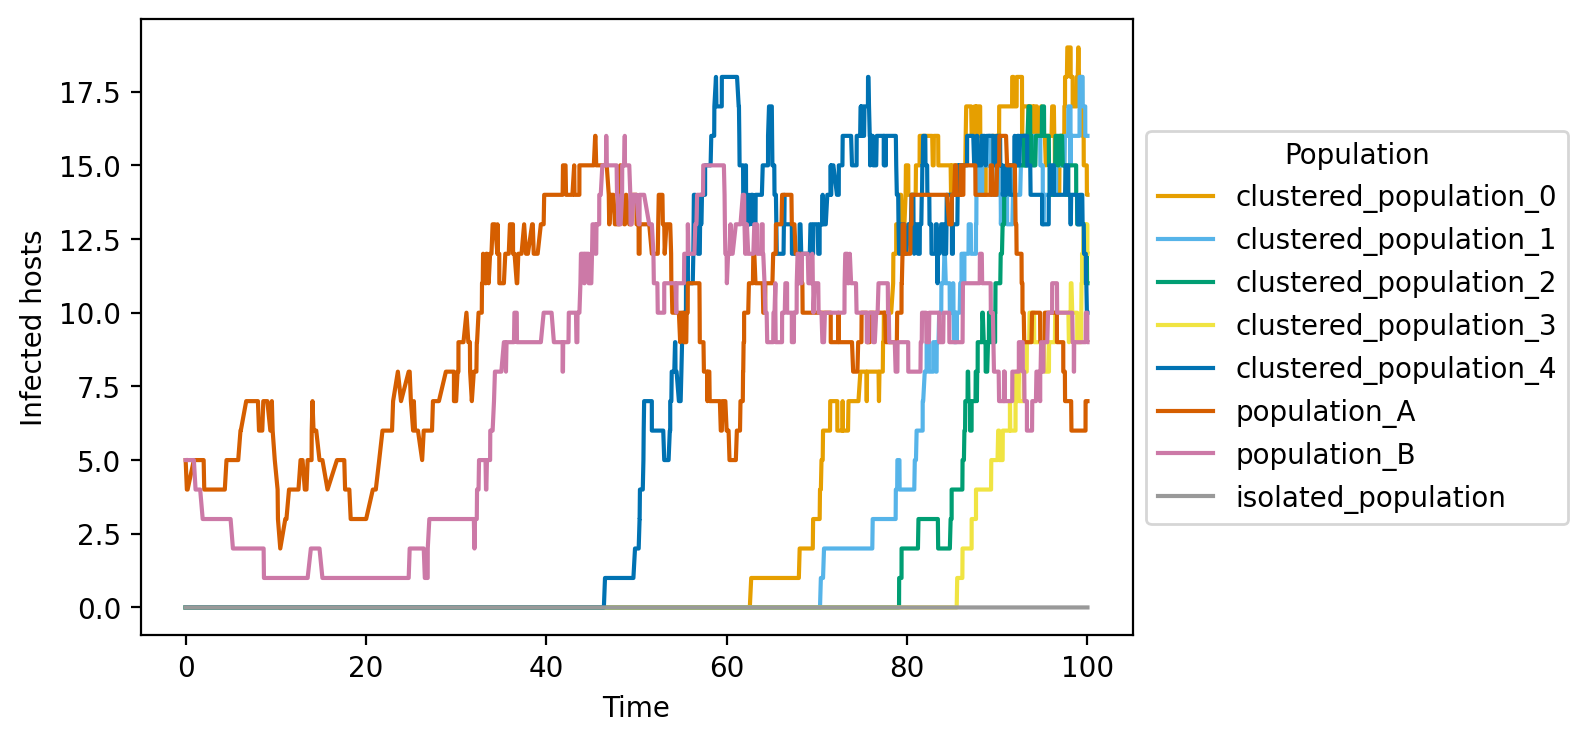

In [2]:
model = Model()
model.newSetup('setup_normal', preset='vector-borne')
model.newSetup(
    'setup_cluster',
    contact_rate_host_vector = ( 2 *
        model.setups['setup_normal'].contact_rate_host_vector ),
    preset='vector-borne'
    ) # uses default parameters but doubles contact rate of the first setup

model.newPopulation('population_A','setup_normal', num_hosts=20, num_vectors=20)
model.newPopulation('population_B','setup_normal', num_hosts=20, num_vectors=20)
    # Create two populations that will be connected.
model.newPopulation(
    'isolated_population','setup_normal', num_hosts=20, num_vectors=20
    ) # A third population will remain isolated.

model.createInterconnectedPopulations(
    5,'clustered_population_','setup_cluster',
    host_migration_rate=0, vector_migration_rate=0,
    vector_host_contact_rate=2e-2,
    host_vector_contact_rate=2e-2,
    num_hosts=20, num_vectors=20
    )
    # Create a cluster of 5 populations connected to each other with a
    # population contact rate of 1e-2 between each of them in both directions.
    # Each population has an numbered ID with the prefix
    # "clustered_population_", has the parameters defined in the "setup_cluster"
    # setup, and has 20 hosts and vectors.
model.linkPopulationsHostVectorContact('population_A','clustered_population_4',2e-2)
model.linkPopulationsVectorHostContact('clustered_population_4','population_A',2e-2)
    # We link population_A to one of the clustered populations with a one-way
    # population contact rate of 1e-2 for population_A hosts and
    # clustered_population_4 vectors. Note that for population contacts, both
    # populations need to have contact rates towards each other (migration does
    # not require this)
model.linkPopulationsHostVectorContact('population_A','population_B',2e-2)
model.linkPopulationsVectorHostContact('population_B','population_A',2e-2)
    # We link population_A to population_B with a one-way
    # population contact rate of 1e-2 for population_A hosts and
    # population_B vectors. Note that for population contacts, both
    # populations need to have contact rates towards each other (migration does
    # not require this)

model.addPathogensToHosts( 'population_A',{'AAAAAAAAAA':5} )
    # population_A starts with AAAAAAAAAA genotype pathogens.
model.addPathogensToHosts( 'population_B',{'GGGGGGGGGG':5} )
    # population_B starts with GGGGGGGGGG genotype pathogens.

output = model.run(0,100,time_sampling=0)
data = model.saveToDataFrame('metapopulations_population_contact_example.csv')
graph = model.populationsPlot( # Plot infected hosts per population over time.
    'metapopulations_population_contact_example.png', data,
    num_top_populations=8, track_specific_populations=['isolated_population'],
        # Make sure to plot th isolated population totals if not in the top
        # infected populations.
    y_label='Infected hosts' # change y label
    )